# Домашнее задание к лекции «Кейс-стади»

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

## Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [6]:
df = pd.read_csv('vgsales.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<b>Как критики относятся к спортивным играм?</b>

Пороговый уровень статистической значимости здесь и далее принмаю за 0.05, так как ошибка не критична.

<i>H0 - Средняя оценка критиками спортивных игр больше или равна 60 баллам (им нравятся спортивные игры)</i>

<i>H1 - Средняя оценка критиками спортивных игр меньше 60 баллов (им не нравятся спортивные игры)</i>

In [7]:
alpha = 0.05
score = 60

In [8]:
result = stats.ttest_1samp(df[df.Genre == 'Sports'].Critic_Score, score, nan_policy='omit')

if (result.statistic < 0) & (result.pvalue / 2 < alpha): 
    print('Отвергаем нулевую гипотезу, среднее меньше 60. Спортивные игры не нравятся критикам.')    
    
else:
    print('Не отвергаем нулевую нулевую гипотезу, спортивные игры нравятся критикам.')
    
print('statistic:', result.statistic)
print('pvalue:', result.pvalue / 2)

Не отвергаем нулевую нулевую гипотезу, спортивные игры нравятся критикам.
statistic: 29.79817370420808
pvalue: 1.3251047326083294e-146


In [9]:
# alternative не поддерживает nan_policy='omit'

result = stats.ttest_1samp(df[(df.Critic_Score.notnull()) & (df.Genre == 'Sports')].Critic_Score, score, alternative='less')

if (result.statistic < 0) & (result.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу, среднее меньше 60. Спортивные игры не нравятся критикам.')    
    
else:
    print('Не отвергаем нулевую нулевую гипотезу, спортивные игры нравятся критикам.')
    
print('statistic:', result.statistic)
print('pvalue:', result.pvalue)

Не отвергаем нулевую нулевую гипотезу, спортивные игры нравятся критикам.
statistic: 29.79817370420808
pvalue: 1.0


Я попробовала два способа рассчёта: стандартный и через атрибут alternative. И так и не смогла понять:

- Значение statistic для обоих способов всегда совпадает

- Значение pvalue разное в зависимости от порогового значения. Например, при 80 или 90 - pvalue одинаково для обоих способов, а при 60 и 70 уже разное. При значении 50: 1 вариант даёт pvalue: 0.0, а второй 1.0.

Какой pvalue правильный? Какой  должна быть интерпретация этих значений?

Получается, если мы ставим достаточно низкое пороговое значение (70 и меньше), то результат: Не отвергаем нулевую нулевую гипотезу, так как statistic > 0 и уже без разницы, какое там pvalue? 

По итогу всё зависит от того, какой порог мы устанавливаем для решения хорошо/плохо.

Дальше буду использовать только старый метод.

<b style='color: red'>Доработано</b>

<b>Критикам нравятся больше игры на PC или на PS4?</b>

<i>H0 - Игры на PC нравятся критикам одинаково или больше, чем на PS4</i>

<i>H1 - Игры на PC нравятся критикам меньше, чем на PS4</i>


In [10]:
PC = df[(df.Critic_Score.notnull()) & (df.Platform == 'PC')].Critic_Score
PS4 = df[(df.Critic_Score.notnull()) & (df.Platform == 'PS4')].Critic_Score

result = stats.ttest_ind(PC, PS4,  alternative='less')
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Игры на PC нравятся критикам меньше.') 
else:
    print('Не отвергаем нулевую гипотезу. Игры на PC нравятся критикам одинаково или больше.')

Ttest_indResult(statistic=4.544112457929973, pvalue=0.9999968921010843)
Не отвергаем нулевую нулевую гипотезу. Игры на PC нравятся критикам одинаково или больше.


<b style='color: red'>Доработано</b>

<b>Критикам больше нравятся стрелялки или стратегии?</b>

<i>H0 - Стрелялки нравятся критикам одинаково или больше, чем стратегии</i>

<i>H1 - Стрелялки нравятся критикам меньше, чем стратегии</i>

In [11]:
score_shooter = df[(df.Critic_Score.notnull()) & (df.Genre == 'Shooter')].Critic_Score
score_strategy = df[(df.Critic_Score.notnull()) & (df.Genre == 'Strategy')].Critic_Score

result = stats.ttest_ind(score_shooter, score_strategy, nan_policy='omit')

if (result.statistic < 0) & (result.pvalue / 2 < alpha): 
    print('Отвергаем нулевую гипотезу. Стрелялки нравятся критикам меньше.')    
    
else:
    print('Не отвергаем нулевую нулевую гипотезу. Стрелялки нравятся критикам одинаково или больше.')
    
print('statistic:', result.statistic)
print('pvalue:', result.pvalue / 2)

Отвергаем нулевую гипотезу. Стрелялки нравятся критикам меньше.
statistic: -2.06670263948504
pvalue: 0.01948435651567801


In [18]:
score_shooter = df[(df.Critic_Score.notnull()) & (df.Genre == 'Shooter')].Critic_Score
score_strategy = df[(df.Critic_Score.notnull()) & (df.Genre == 'Strategy')].Critic_Score

result = stats.ttest_ind(score_shooter, score_strategy,  alternative='less')
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Стрелялки нравятся критикам меньше.')    
else:
    print('Не отвергаем нулевую нулевую гипотезу. Стрелялки нравятся критикам больше.')

Ttest_indResult(statistic=-2.06670263948504, pvalue=0.01948435651567801)
Отвергаем нулевую гипотезу. Стрелялки нравятся критикам меньше.


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

- Привидите весь текст к нижнему регистру;
- Удалите мусорные символы;
- Удалите стоп-слова;
- Привидите все слова к нормальной форме;
- Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:


<code>from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)</code>


Можете поэкспериментировать с параметрами TfidfVectorizer;

- Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
- Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
- Опишите результаты при помощи confusion_matrix;
- Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [12]:
spam = pd.read_csv('spam.csv')

spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
stopwords_set = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()


def formated_text(text):
    text = re.sub('[\W_]+',' ', text).lower()
    text = text.split()   
    without_sw = [word for word in text if word not in stopwords_set]   
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in without_sw]
    return ' '.join(lemmatized_text)

spam['formated'] = spam.Message.apply(formated_text)
spam.head()

,Category,Message,formated
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, ngram_range=(2,2), analyzer='word')
tfidf_matrix = tfidf.fit_transform(spam.formated)
names = tfidf.get_feature_names()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

tfidf_matrix.head()

,0 game,0 key,00 easter,00 per,00 sub,000 bonus,000 cash,000 homeowner,000 pound,000 price,...,ü want,ü willing,ü wkg,ü write,ü xuhui,ü yet,ü yup,ü ü,〨ud evening,鈥 〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
spam['vector'] = tfidf_matrix.sum(axis=1)
spam.head()

,Category,Message,formated,vector
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,3.872983
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,2.234123
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,4.886668
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,2.817086
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,2.448439


In [16]:
droped_df = spam.drop(['Category', 'formated'], axis=1)

X = droped_df
y = list(spam['Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_test.head()

,Message,vector
3245,Squeeeeeze!! This is christmas hug.. If u lik ...,4.786686
944,And also I've sorta blown him off a couple tim...,3.316108
1044,Mmm thats better now i got a roast down me! i...,3.161747
2484,Mm have some kanji dont eat anything heavy ok,2.449490
812,So there's a ring that comes with the guys cos...,2.828427


In [17]:
train = X_train[['vector']]
test = X_test[['vector']]

lda = LinearDiscriminantAnalysis()
lda.fit(train, y_train)
lda.predict(test)
res = pd.DataFrame([y_test, lda.predict(test)]).T

res.columns = ['true', 'predicted']

res.head()

,true,predicted
0,ham,spam
1,ham,ham
2,ham,ham
3,ham,ham
4,ham,ham


<b style='color: red'>Доработано</b>

In [18]:
df_errors = pd.concat([pd.DataFrame(X_test.Message).reset_index(), res], axis=1)

# Data Frame с различиями
df_errors[df_errors.true != df_errors.predicted].head()

,index,Message,true,predicted
0,3245,Squeeeeeze!! This is christmas hug.. If u lik ...,ham,spam
23,381,I guess that's why you re worried. You must kn...,ham,spam
31,4789,Thanx. Yup we coming back on sun. Finish dinne...,ham,spam
40,881,Reminder: You have not downloaded the content ...,spam,ham
47,1961,Guess what! Somebody you know secretly fancies...,spam,ham


In [19]:
accuracy_score(y_test, lda.predict(X_test[['vector']]))

0.868421052631579

In [20]:
lda.coef_

array([[1.47434284]])

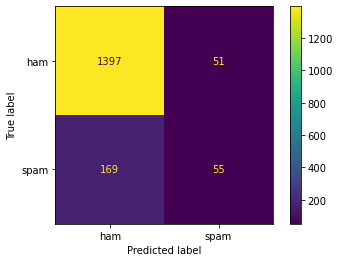

In [21]:
plot_confusion_matrix(lda, X_test[['vector']], y_test)  
plt.show()  

Точность модели довольно высокая - 87%. 220 значений из тестовой выборки предсказано неверно: 51 сообщение ошибочно попало в спам, 169 спам-сообщений классифицированы как обычные.